# Test Document: HOWTO

Write down any of your tests below. Check if the behavior of the simulation/RL model works as you expect it to be  
We recommend annotating your tests with a preceding Markdown cell that describes what test you're performing.

### Traffic Light Testing

In [ ]:
from roadgraph.simulator import *

# Create network
network = RoadNetwork()
network.add_node(1, (0, 0))
network.add_node(2, (100, 0))
network.add_node(3, (200, 0))
network.add_two_way_road(1, 2, 2, 15)
network.add_two_way_road(2, 3, 2, 15)

phases = [
    Phase(green_roads=[(1, 2)], name="Road 1->2 Green"),
    Phase(green_roads=[(3, 2)], name="Road 3->2 Green")
]
light = TrafficLight(intersection_id=2, phases=phases, green_time=10.0)

# START WITH PHASE 1 (so road 1->2 is RED)
light.current_phase_index = 1  
network.graph.nodes[2]['traffic_light'] = light

# Spawn vehicle
sim = Simulation(network)
sim.spawn_vehicle(1, 2, 3, 0, length=5, max_speed=30)

# Run and observe
for i in range(200):
    sim.step()
    if i % 10 == 0:
        v = sim.vehicles[0] if sim.vehicles else None
        if v:
            light_state = light.get_state_for_road(1, 2)
            print(f"Time: {sim.time:.1f}s, pos={v.position:.1f}, spd={v.speed:.1f}, "
                  f"road={v.current_road}, light_for_road={light_state}, "
                  f"phase={light.current_phase.name}")

In [ ]:
# Start with green, then manually change to red
light.current_phase_index = 0  # Start green for (1,2)
network.graph.nodes[2]['traffic_light'] = light

sim = Simulation(network)
sim.spawn_vehicle(1, 2, 3, 0, length=5, max_speed=30)

# Run simulation with manual phase change
for i in range(200):
    # Change light to red when vehicle is halfway
    if i == 40:  # Around 4 seconds in
        light.request_phase_change(1)
        print(">>> REQUESTING PHASE CHANGE TO RED <<<")
    
    sim.step()
    
    if i % 10 == 0 or i == 40:
        
        v = sim.vehicles[0] if sim.vehicles else None
        if v:
            light_state = light.get_state_for_road(1, 2)
            print(f"Time: {sim.time:.1f}s, pos={v.position:.1f}, spd={v.speed:.1f}, "
                  f"light={light_state}")

In [ ]:
# Start with red, then change to green
network = RoadNetwork()
network.add_node(1, (0, 0))
network.add_node(2, (100, 0))
network.add_node(3, (200, 0))
network.add_two_way_road(1, 2, 2, 15)
network.add_two_way_road(2, 3, 2, 15)

phases = [
    Phase(green_roads=[(1, 2)], name="Road 1->2 Green"),
    Phase(green_roads=[(3, 2)], name="Road 3->2 Green")
]
light = TrafficLight(intersection_id=2, phases=phases, green_time=5.0, min_green_time=5.0)
light.current_phase_index = 1  # Start red for (1,2)
network.graph.nodes[2]['traffic_light'] = light

sim = Simulation(network)
sim.spawn_vehicle(1, 2, 3, 0, length=5, max_speed=30)

# Run and manually change light
for i in range(250):
    # Change to green after vehicle has been stopped for a bit
    if i == 150:  # 15 seconds in
        print(">>> CHANGING TO GREEN <<<")
        light.request_phase_change(0)
    
    sim.step()
    
    if i % 10 == 0 or i == 150:
        v = sim.vehicles[0] if sim.vehicles else None
        if v:
            light_state = light.get_state_for_road(1, 2)
            print(f"Time: {sim.time:.1f}s, pos={v.position:.1f}, spd={v.speed:.1f}, "
                  f"road={v.current_road}, light={light_state}")

In [ ]:
from roadgraph.simulator import Simulation, RoadNetwork, DemandPattern, Phase, TrafficLight, SimulationVisualizer

# Create network
network = RoadNetwork()
network.add_node(1, (0, 0))
network.add_node(2, (100, 0))
network.add_node(3, (200, 0))
network.add_two_way_road(1, 2, 2, 15)
network.add_two_way_road(2, 3, 2, 15)

# Add traffic light
phases = [
    Phase(green_roads=[(1, 2)], name="Road 1->2"),
    Phase(green_roads=[(3, 2)], name="Road 3->2")
]
light = TrafficLight(intersection_id=2, phases=phases, green_time=30.0)
network.graph.nodes[2]['traffic_light'] = light

# Create simulation
sim = Simulation(network)
viz = SimulationVisualizer(sim)

# Configure traffic generation
heavy_hour = DemandPattern.create_heavy_traffic_pattern()
sim.enable_traffic_generation(heavy_hour)
sim.add_spawn_point(1, 2)
sim.add_origin_destination_pair(1, 3, weight=1.0)

"""
_____x_____
___________
X____X____X
___________
_____X_____
"""

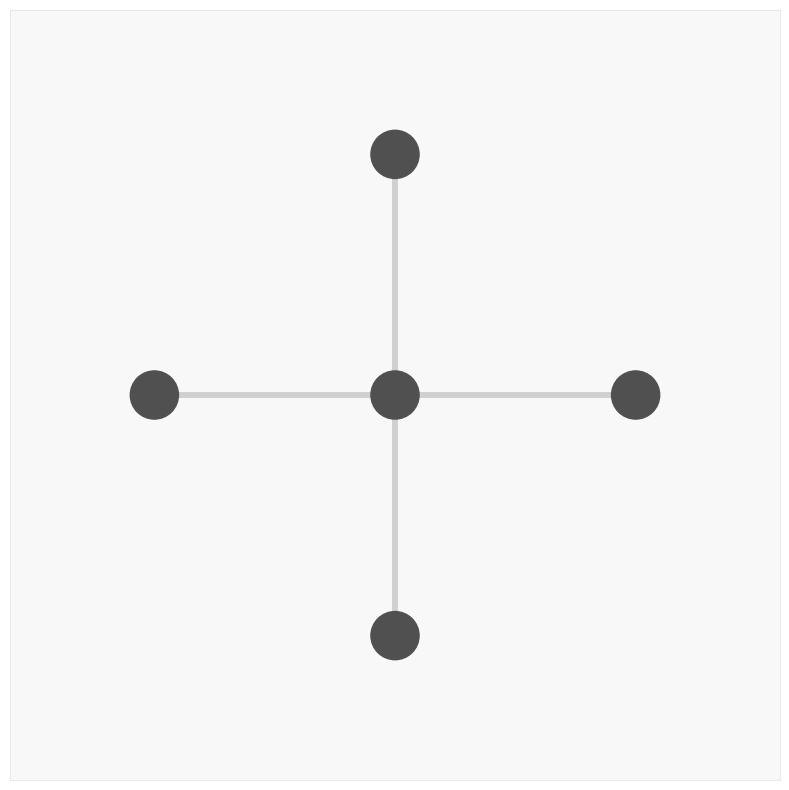

In [ ]:
from roadgraph.simulator import *
test = RoadNetwork()

test.add_node(1, (50,0))
test.add_node(2, (100,50))
test.add_node(3, (50,100))
test.add_node(4, (0,50))
test.add_node(5, (50, 50))

test.add_two_way_road(1,5)
test.add_two_way_road(2,5)
test.add_two_way_road(3,5)
test.add_two_way_road(4,5)

sim = Simulation(test)
viz = SimulationVisualizer(sim)

heavy_hour = DemandPattern.create_heavy_traffic_pattern()
sim.enable_traffic_generation(heavy_hour)
for i in range(1,5):
    sim.add_spawn_point(i,5)

for i in range(5):
    for j in range(5):
        sim.add_origin_destination_pair(i,j)


